In [11]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  




In [9]:
import pandas as pd


file_path = r"C:\Users\user\Downloads\wine\wine.data"


column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash",
                "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols",
                "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315", "Proline"]


df = pd.read_csv(file_path, names=column_names)


df.head()


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
print(df["Class"].value_counts())


Class
2    71
1    59
3    48
Name: count, dtype: int64


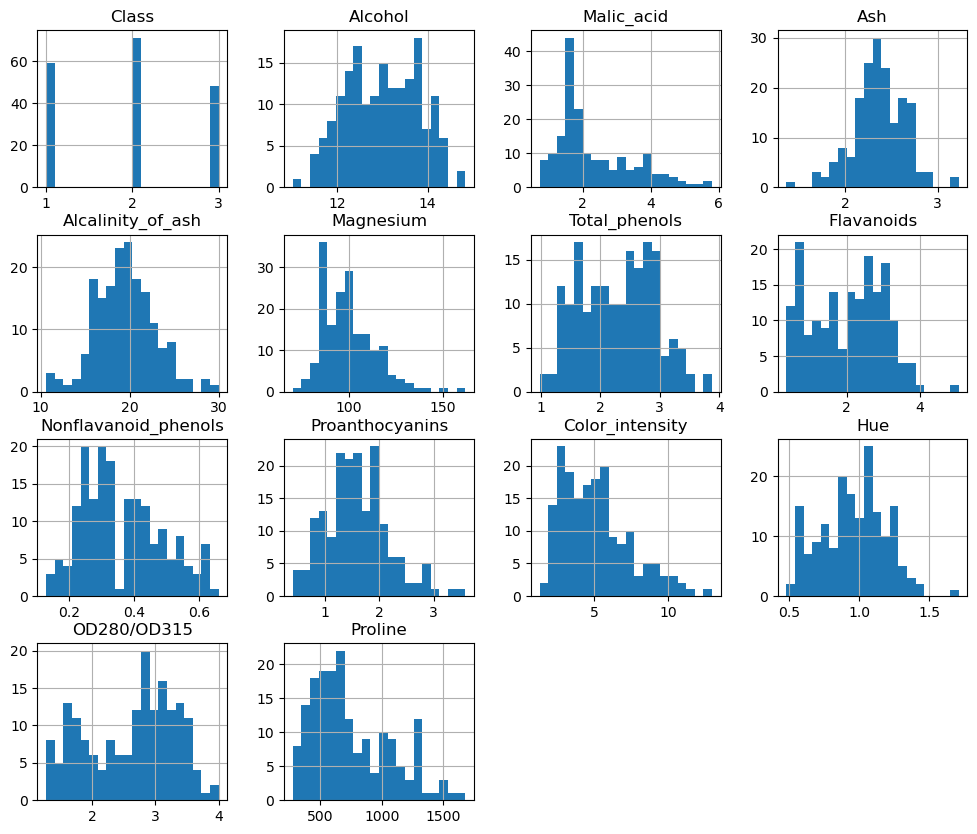

In [15]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=20)
plt.show()



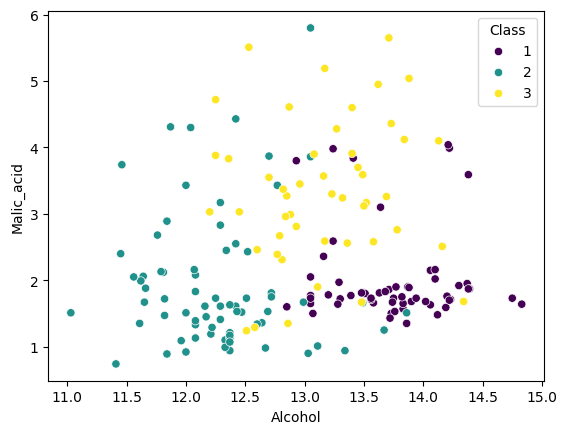

In [17]:
import seaborn as sns

sns.scatterplot(x=df["Alcohol"], y=df["Malic_acid"], hue=df["Class"], palette="viridis")
plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:].astype(float))

df_normalized.head()


C:\Users\user\AppData\Local\Temp\ipykernel_23264\2516244530.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.61956522 0.32608696 0.33695652 0.4673913  0.52173913 0.45652174
 0.2826087  0.55434783 0.29347826 0.30434783 0.38043478 0.27173913
 0.20652174 0.22826087 0.34782609 0.45652174 0.54347826 0.48913043
 0.41304348 0.5        0.60869565 0.34782609 0.33695652 0.27173913
 0.2826087  0.58695652 0.25       0.26086957 0.40217391 0.2826087
 0.33695652 0.39130435 0.36956522 0.67391304 0.43478261 0.32608696
 0.43478261 0.30434783 0.30434783 0.63043478 0.51086957 0.2173913
 0.33695652 0.35869565 0.40217391 0.44565217 0.34782609 0.33695652
 0.35869565 0.41304348 0.23913043 0.26086957 0.44565217 0.48913043
 0.52173913 0.5        0.52173913 0.34782609 0.41304348 0.19565217
 0.33695652 0.32608696 0.26086957 0.18478261 0.36956522 0.30434783
 0.08695652 0.08695652 0.43478261 0.88043478 0.35869565 0.17391304
 0.18478261 0.

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [23]:
from sklearn.model_selection import train_test_split

X = df_normalized.iloc[:, 1:]  
y = df_normalized.iloc[:, 0]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in np.array(X_test):
            distances = []
            for i, x_train in enumerate(self.X_train):
                if self.distance_metric == "euclidean":
                    dist = euclidean_distance(x, x_train)
                else:
                    dist = manhattan_distance(x, x_train)
                distances.append((dist, self.y_train[i]))
            
            distances.sort(key=lambda x: x[0])
            k_nearest_neighbors = [label for _, label in distances[:self.k]]
            most_common = Counter(k_nearest_neighbors).most_common(1)[0][0]
            predictions.append(most_common)
        
        return np.array(predictions)


In [29]:
knn_model = KNN(k=3, distance_metric="euclidean")
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9722


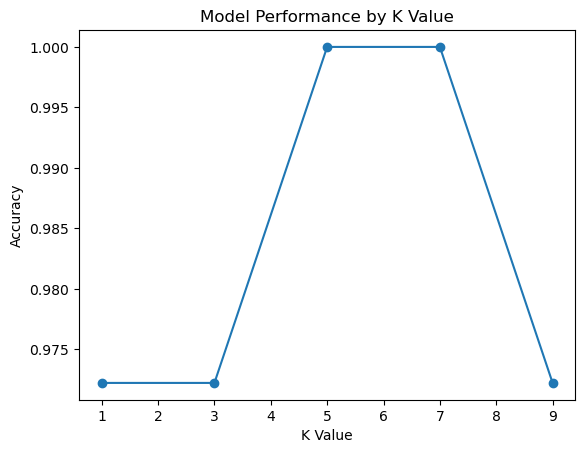

In [33]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn_model = KNN(k=k, distance_metric="euclidean")
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Model Performance by K Value")
plt.show()


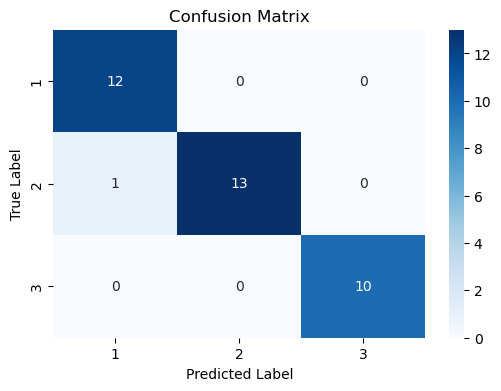

Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", cr)
